In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader

# Import custom modules
from data_preparation import load_and_preprocess_data, prepare_sequence_data, split_data_by_race, save_data_splits, prepare_regression_data
from features import RaceFeatures
from lstm import F1PredictionModel, F1Dataset, F1DataPreprocessor, train_model, save_model_with_preprocessor
from evaluation import evaluate_model, plot_predictions

# Load and preprocess data
print("Loading and preprocessing data...")
df = load_and_preprocess_data()

df.head()


Loading and preprocessing data...


/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:25: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  practice_sessions = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)
/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:26: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  tire_data = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)


(586171, 15)
(586171, 32)
(586171, 40)
(586171, 45)
(586171, 46)
(586171, 47)
(586171, 47)


/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['pitstop_milliseconds'].fillna(0, inplace=True)  # Assuming 0 if no pit stop
/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

(586171, 56)


/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:196: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['Compound'].fillna('UNKNOWN', inplace=True)
/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:249: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Matching for 1
Matching for 2
Matching for 3
Matching for 4
Matching for 5
Matching for 6
Matching for 7
Matching for 8
Matching for 9
Matching for 10
Matching for 11
Matching for 12
Matching for 13
Matching for 14
Matching for 15
Matching for 16
Matching for 17
Matching for 18
Matching for 19
Matching for 20
Matching for 21
Matching for 22
Matching for 23
Matching for 24
Matching for 25
Matching for 26
Matching for 27
Matching for 28
Matching for 29
Matching for 30
Matching for 31
Matching for 32
Matching for 33
Matching for 34
Matching for 35
Matching for 36
Matching for 37
Matching for 38
Matching for 39
Matching for 40
Matching for 41
Matching for 42
Matching for 43
Matching for 44
Matching for 45
Matching for 46
Matching for 47
Matching for 48
Matching for 49
Matching for 50
Matching for 51
Matching for 52
Matching for 53
Matching for 54
Matching for 55
Matching for 56
Matching for 57
Matching for 58
Matching for 59
Matching for 60
Matching for 61
Matching for 62
Matching for 63
M

/Users/yannikhahn/Code/ie500-data-mining-group7/lap_simulation/data_preparation.py:570: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['TrackStatus'].fillna(1, inplace=True)  # 1 = regular racing status


Shape before filtering and outlier removal: (586171, 95)
Normal racing laps: (528281, 95)
Special laps (pit stops, safety car, etc.): (57890, 95)
Final shape after outlier removal: (497845, 95)


,raceId,driverId,lap,position,time,milliseconds,date,driverRef,number,code,...,humidity,driver_aggression,driver_overall_skill,driver_circuit_skill,driver_consistency,driver_reliability,driver_risk_taking,tire_age,fuel_load,track_position
17490,989.0,1,2,1,1:30.265,90265,2018-03-25,hamilton,44.0,HAM,...,50.0,0.218923,0.369475,0.369475,0.0,0.9,0.218923,1.0,57.0,1
17491,989.0,1,3,1,1:29.809,89809,2018-03-25,hamilton,44.0,HAM,...,50.0,0.218923,0.369475,0.369475,0.0,0.9,0.218923,2.0,56.0,1
17492,989.0,1,4,1,1:29.473,89473,2018-03-25,hamilton,44.0,HAM,...,50.0,0.218923,0.369475,0.369475,0.0,0.9,0.218923,3.0,55.0,1
17493,989.0,1,5,1,1:29.161,89161,2018-03-25,hamilton,44.0,HAM,...,50.0,0.218923,0.369475,0.369475,0.0,0.9,0.218923,4.0,54.0,1
17494,989.0,1,8,1,1:29.092,89092,2018-03-25,hamilton,44.0,HAM,...,50.0,0.218923,0.369475,0.369475,0.0,0.9,0.218923,7.0,51.0,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# One hot encoding for the column "code"


X = df.drop(columns=["cumulative_milliseconds", "positionOrder", "date", "driverRef", "number", "date_race", "time_race", "time", "forename", "surname", "dob", "url_x", "name_x", "url_race", "name_y", "location", "circuitRef"])


X = X.drop(columns=["milliseconds"])
y = df["milliseconds"]

X.head()

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79074 entries, 17490 to 497113
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   79074 non-null  float64
 1   driverId                 79074 non-null  int64  
 2   lap                      79074 non-null  int64  
 3   position                 79074 non-null  int64  
 4   code                     79074 non-null  object 
 5   nationality              79074 non-null  object 
 6   year                     79074 non-null  float64
 7   round                    79074 non-null  int64  
 8   circuitId                79074 non-null  int64  
 9   country                  79074 non-null  object 
 10  lat                      79074 non-null  float64
 11  lng                      79074 non-null  float64
 12  alt                      79074 non-null  int64  
 13  grid                     79074 non-null  int64  
 14  statusId              

In [4]:
X = pd.get_dummies(
    X, columns=["code", "nationality", "status", "circuit_type", "country"]
)

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Display the first few rows of the normalized data
X_normalized.head()

,raceId,driverId,lap,position,year,round,circuitId,lat,lng,alt,...,country_Portugal,country_Qatar,country_Russia,country_Saudi Arabia,country_Singapore,country_Spain,country_Turkey,country_UAE,country_UK,country_USA
0,-1.350226,-1.968462,-1.663099,-1.605783,-1.106942,-1.507218,-1.044008,-3.375867,2.232356,-0.542052,...,-0.170823,-0.109389,-0.206267,-0.129993,-0.15661,-0.23523,-0.127557,-0.192306,-0.223406,-0.215331
1,-1.350226,-1.968462,-1.607240,-1.605783,-1.106942,-1.507218,-1.044008,-3.375867,2.232356,-0.542052,...,-0.170823,-0.109389,-0.206267,-0.129993,-0.15661,-0.23523,-0.127557,-0.192306,-0.223406,-0.215331
2,-1.350226,-1.968462,-1.551380,-1.605783,-1.106942,-1.507218,-1.044008,-3.375867,2.232356,-0.542052,...,-0.170823,-0.109389,-0.206267,-0.129993,-0.15661,-0.23523,-0.127557,-0.192306,-0.223406,-0.215331
3,-1.350226,-1.968462,-1.495521,-1.605783,-1.106942,-1.507218,-1.044008,-3.375867,2.232356,-0.542052,...,-0.170823,-0.109389,-0.206267,-0.129993,-0.15661,-0.23523,-0.127557,-0.192306,-0.223406,-0.215331
4,-1.350226,-1.968462,-1.327942,-1.605783,-1.106942,-1.507218,-1.044008,-3.375867,2.232356,-0.542052,...,-0.170823,-0.109389,-0.206267,-0.129993,-0.15661,-0.23523,-0.127557,-0.192306,-0.223406,-0.215331


In [13]:
# Assuming X_train_scaled is already scaled data from StandardScaler

# Fit PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(X_normalized)

# Retrieve eigenvectors (components/loadings)
eigenvectors = pca.components_  # Shape: (n_components, n_features)

# Retrieve eigenvalues (explained variance)
eigenvalues = pca.explained_variance_


# Explained variance ratio (proportion of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for loadings
loadings = pd.DataFrame(
    eigenvectors.T,  # Transpose to align features as rows and PCs as columns
    columns=[f"PC{i+1}" for i in range(eigenvectors.shape[0])],
    index=X.columns,  # Assuming columns are the feature names
)

# Display the loadings
print("PCA Loadings (Feature Contributions):")
print(loadings)

# Explained variance
print("\nExplained Variance Ratio:")
print(
    pd.Series(
        explained_variance_ratio,
        index=[f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    )
)

# Most important features for PC1
important_features_pc1 = loadings["PC1"].abs().sort_values(ascending=False)
print("\nMost Important Features for PC1:")
print(important_features_pc1)

PCA Loadings (Feature Contributions):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
raceId          0.031298 -0.107185  0.331051 -0.097067 -0.153251  0.016702   
driverId       -0.037818 -0.009944  0.089284 -0.037673 -0.117991 -0.202247   
lap             0.010225 -0.168164  0.144433  0.437858  0.108000 -0.052310   
position       -0.249459 -0.024900  0.078144 -0.108117  0.097145 -0.160859   
year            0.032573 -0.111028  0.342563 -0.099599 -0.171742  0.023639   
...                  ...       ...       ...       ...       ...       ...   
country_Spain  -0.001847 -0.037871 -0.035458  0.005004 -0.011887  0.001360   
country_Turkey  0.001794  0.023242  0.009967  0.004482  0.014848  0.004563   
country_UAE    -0.006052  0.127815  0.017419  0.013644  0.061889 -0.029239   
country_UK      0.005200  0.042139  0.019569  0.009327 -0.009110  0.022477   
country_USA     0.000457  0.042547  0.036781 -0.019534  0.026249 -0.005851   

                     PC7 

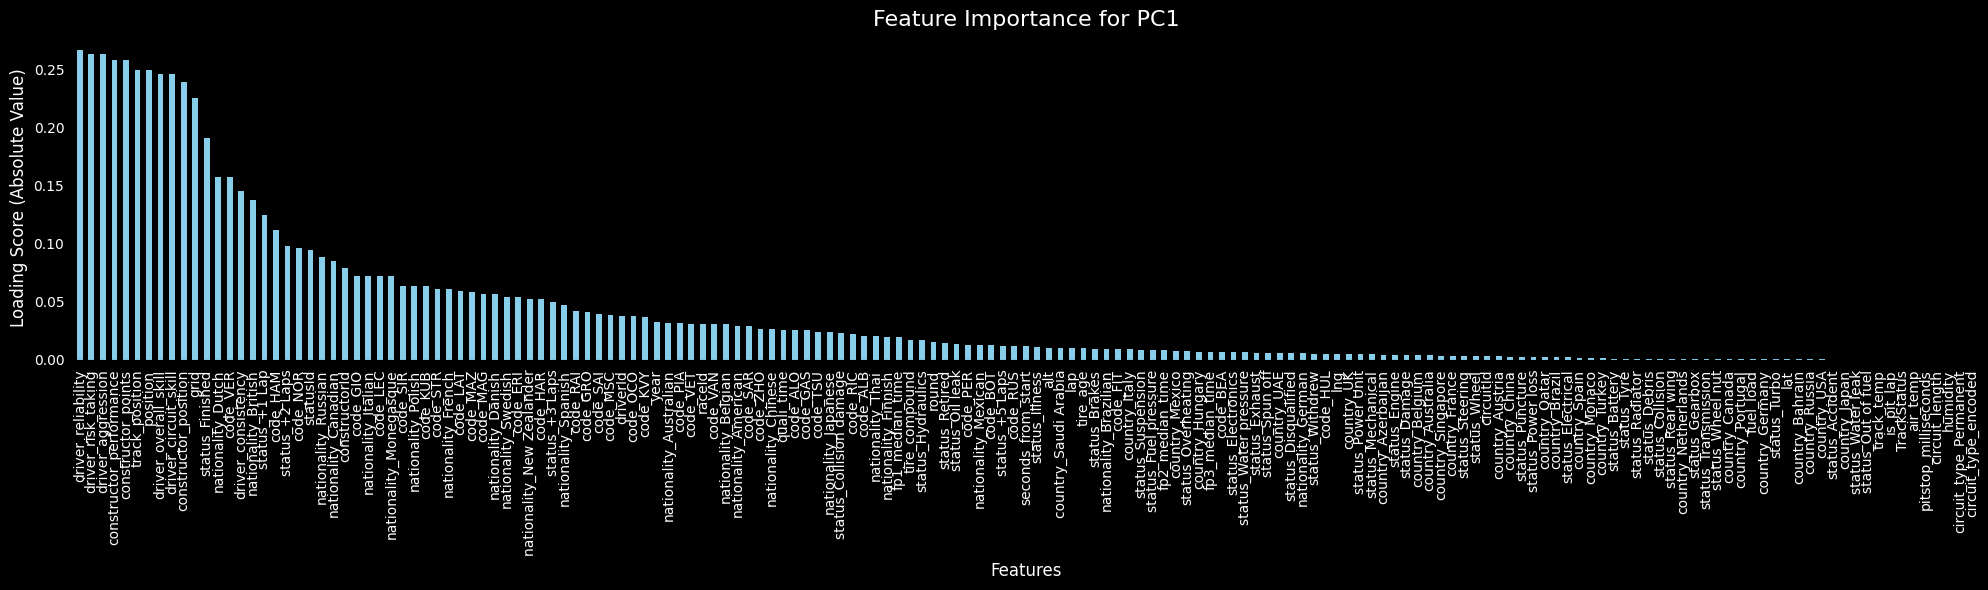

In [14]:
import matplotlib.pyplot as plt

# Bar plot for feature importance in PC1
plt.figure(figsize=(20, 6))
important_features_pc1.plot(kind="bar", color="skyblue")  # Bar color

# Customize the plot
plt.title("Feature Importance for PC1", fontsize=16, color="white")  # Title in white
plt.ylabel(
    "Loading Score (Absolute Value)", fontsize=12, color="white"
)  # Y-axis label in white
plt.xlabel("Features", fontsize=12, color="white")  # X-axis label in white

# Change tick colors to white
plt.xticks(rotation=90, fontsize=10, color="white")  # X-ticks in white
plt.yticks(fontsize=10, color="white")  # Y-ticks in white

# Change background color
plt.gca().set_facecolor("black")  # Axes background color
plt.gcf().set_facecolor("black")  # Figure background color

plt.tight_layout()
plt.show()

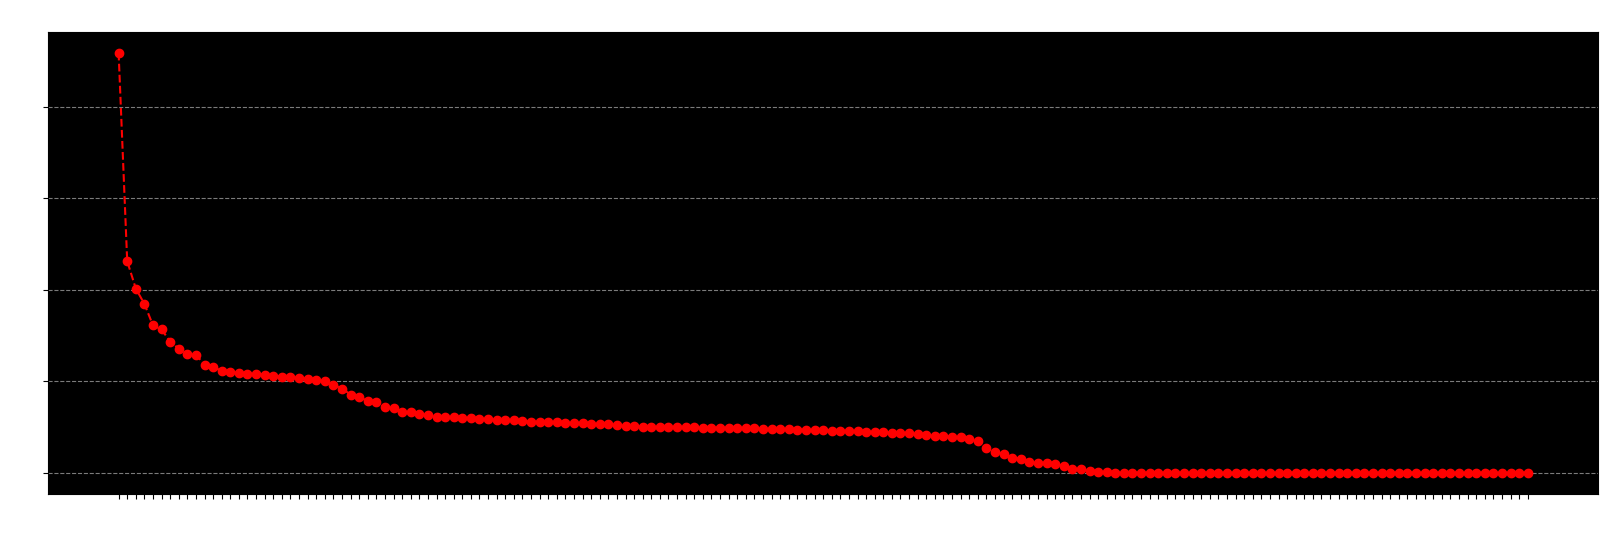

In [15]:
# Scree plot
plt.figure(figsize=(20, 6))
plt.plot(
    range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="--", color="r"
)
plt.title("Scree Plot", color="white")
plt.xlabel("Principal Component Index", color="white")
plt.ylabel("Eigenvalue", color="white")
plt.xticks(range(1, len(eigenvalues) + 1), color="white")
plt.yticks(color="white")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().set_facecolor("black")  # Set the background color to black
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# Perform initial train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# Further split the training set into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,  # 0.25 * 0.8 = 0.2 of the total data
)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47444, 165)
X_validation shape: (15815, 165)
X_test shape: (15815, 165)
y_train shape: (47444,)
y_validation shape: (15815,)
y_test shape: (15815,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.decomposition import PCA

# Define a range of n_components to try
n_components_range = range(1, 165)  # Example range from 1 to 10

# Initialize a dictionary to store RMSE for each n_components
rmse_dict = {}

for n_components in n_components_range:
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_validation_pca = pca.transform(X_validation)
    
    # Initialize the linear regression model
    log_reg_pca = LinearRegression()
    
    # Train the model
    log_reg_pca.fit(X_train_pca, y_train)
    
    # Make predictions on the validation set
    y_pred_pca = log_reg_pca.predict(X_validation_pca)
    
    # Calculate RMSE
    rmse = root_mean_squared_error(y_validation, y_pred_pca)
    rmse_dict[n_components] = rmse
    print(f"n_components: {n_components}, RMSE: {rmse}")

# Find the best n_components with the lowest RMSE
best_n_components = min(rmse_dict, key=rmse_dict.get)
print(f"Best n_components: {best_n_components}, RMSE: {rmse_dict[best_n_components]}")

n_components: 1, RMSE: 11332.28489910575
n_components: 2, RMSE: 5345.662519232867
n_components: 3, RMSE: 4835.859160869763
n_components: 4, RMSE: 4835.810416407218
n_components: 5, RMSE: 4824.751568442902
n_components: 6, RMSE: 4817.861303118153
n_components: 7, RMSE: 4472.022744698358
n_components: 8, RMSE: 4408.255685038272
n_components: 9, RMSE: 4378.628035050692
n_components: 10, RMSE: 4314.822945463757
n_components: 11, RMSE: 4311.916549779321
n_components: 12, RMSE: 4303.126206373301
n_components: 13, RMSE: 4225.208837481536
n_components: 14, RMSE: 4215.174525516053
n_components: 15, RMSE: 4212.819162722183
n_components: 16, RMSE: 4210.159053014772
n_components: 17, RMSE: 4201.2632559686635
n_components: 18, RMSE: 4201.290626473609
n_components: 19, RMSE: 4189.326779021624
n_components: 20, RMSE: 4184.627023531868
n_components: 21, RMSE: 4175.778786299864
n_components: 22, RMSE: 4169.82136280635
n_components: 23, RMSE: 4167.395710879051
n_components: 24, RMSE: 4145.529538927941
n

In [12]:
# Save the trained model to a .pth file
torch.save(log_reg_pca, 'linear_regression_model.pth')

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_regressor.predict(X_validation)

# Calculate RMSE
rmse_rf = root_mean_squared_error(y_validation, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 1132.0648720708687


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42, )

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_regressor.predict(X_validation)

# Calculate RMSE
rmse_xgb = root_mean_squared_error(y_validation, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 1175.9735074391228


In [45]:
# Download [houses dataset](https://www.openml.org/d/537) from OpenML. The task is to predict median price of the house in the region based on demographic composition and a state of housing market in the region.
from flaml import AutoML

automl = AutoML()
settings = {
    "time_budget": 200,  # total running time in seconds
    "metric": "mse",  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": [
        "xgboost"
    ],  # list of ML learners; we tune XGBoost in this example
    "task": "regression",  # task type
    "log_file_name": "f1regression.log",  # flaml log file
    "seed": 7654321,  # random seed
}
automl.fit(X_train=X_train, y_train=y_train, X_val=X_validation, y_val=y_validation, **settings)

[flaml.automl.logger: 11-30 20:10:06] {1728} INFO - task = regression
[flaml.automl.logger: 11-30 20:10:06] {1736} INFO - Data split method: uniform
[flaml.automl.logger: 11-30 20:10:06] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 11-30 20:10:06] {1838} INFO - Minimizing error metric: mse
[flaml.automl.logger: 11-30 20:10:06] {1955} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 11-30 20:10:06] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 11-30 20:10:06] {2393} INFO - Estimated sufficient time budget=2938s. Estimated necessary time budget=3s.
[flaml.automl.logger: 11-30 20:10:06] {2442} INFO -  at 0.7s,	estimator xgboost's best error=72644685.0556,	best estimator xgboost's best error=72644685.0556
[flaml.automl.logger: 11-30 20:10:06] {2258} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 11-30 20:10:06] {2442} INFO -  at 0.8s,	estimator xgboost's best error=72644685.0556,	best estimator xgboo

In [46]:
print("Best hyperparmeter config:", automl.best_config)
print("Best r2 on validation data: {0:.4g}".format(1 - automl.best_loss))
print("Training duration of best run: {0:.4g} s".format(automl.best_config_train_time))

model = automl.model.estimator

y_pred_flaml = automl.predict(X_test)
print("Predicted labels", y_pred_flaml)

# Calculate RMSE
rmse_flaml = root_mean_squared_error(y_validation, y_pred_flaml)
print(f"FLAML RMSE: {rmse_flaml}")


Best hyperparmeter config: {'n_estimators': 141, 'max_leaves': 1435, 'min_child_weight': np.float64(0.02924211736262778), 'learning_rate': np.float64(0.04851984921111823), 'subsample': np.float64(0.8153275130635619), 'colsample_bylevel': np.float64(0.9611222934264363), 'colsample_bytree': np.float64(0.8625300625900543), 'reg_alpha': np.float64(0.32608655266181014), 'reg_lambda': np.float64(7.854762700051379)}
Best r2 on validation data: -1.324e+06
Training duration of best run: 11.64 s
Predicted labels [ 92391.19  77731.13  96537.39 ... 109757.48 103134.88 101270.45]
FLAML RMSE: 15969.94467580794


<BarContainer object of 156 artists>

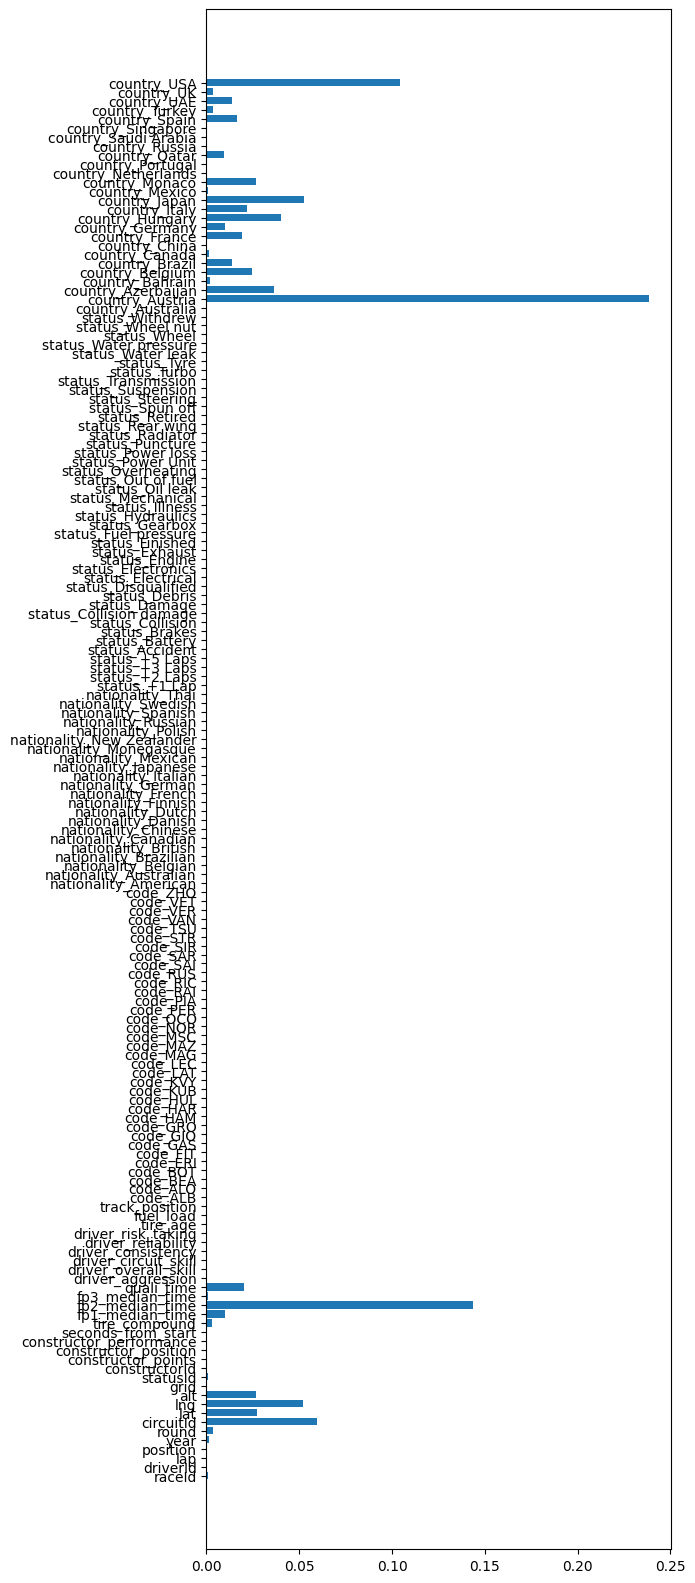

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 20))
plt.barh(automl.feature_names_in_, automl.feature_importances_)